In [6]:
import itertools
from collections import Counter
import datetime
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
import datetime
import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("Monthly Data/1.csv")
df_airp_dir = pd.read_csv("Lookup Tables/L_AIRPORT_ID.csv")
df_carrier_dir = pd.read_csv("Lookup Tables/L_CARRIER_HISTORY.csv")

In [9]:
path =r'C:\Users\Pranay\Documents\GitHub\DS-Challenges\bcgCase\Monthly Data' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for i,file_ in enumerate(allFiles):
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
df = pd.concat(list_)

### Q1. What is the 15th most flown route? 

In [10]:
df.head()

,FL_DATE,UNIQUE_CARRIER,AIRLINE_ID,CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,...,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,Unnamed: 50
0,2014-01-01,AA,19805,AA,N002AA,2377,12278,1227802,30928,ICT,...,1300-1359,0.0,0.0,85.0,78.0,57.0,1.0,328.0,2,NaN
1,2014-01-01,AA,19805,AA,N3FXAA,2378,13303,1330303,32467,MIA,...,2300-2359,0.0,0.0,60.0,55.0,37.0,1.0,204.0,1,NaN
2,2014-01-01,EV,20366,EV,N906EV,2500,11298,1129803,30194,DFW,...,2200-2259,1.0,0.0,60.0,NaN,NaN,1.0,247.0,1,NaN
3,2014-01-01,EV,20366,EV,N903EV,2502,11146,1114603,31146,CRW,...,1900-1959,0.0,0.0,185.0,180.0,150.0,1.0,946.0,4,NaN
4,2014-01-01,EV,20366,EV,N903EV,2502,11298,1129803,30194,DFW,...,1600-1659,0.0,0.0,125.0,115.0,101.0,1.0,946.0,4,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5819811 entries, 0 to 469488
Data columns (total 51 columns):
FL_DATE                  object
UNIQUE_CARRIER           object
AIRLINE_ID               int64
CARRIER                  object
TAIL_NUM                 object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN_AIRPORT_SEQ_ID    int64
ORIGIN_CITY_MARKET_ID    int64
ORIGIN                   object
ORIGIN_CITY_NAME         object
ORIGIN_STATE_ABR         object
ORIGIN_STATE_FIPS        int64
ORIGIN_STATE_NM          object
ORIGIN_WAC               int64
DEST_AIRPORT_ID          int64
DEST_AIRPORT_SEQ_ID      int64
DEST_CITY_MARKET_ID      int64
DEST                     object
DEST_CITY_NAME           object
DEST_STATE_ABR           object
DEST_STATE_FIPS          int64
DEST_STATE_NM            object
DEST_WAC                 int64
CRS_DEP_TIME             int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
DE

In [12]:
#A sequence be defined as the a combination of destination & Origin airport ID's.
##ORIGIN_AIRPORT_ID
##DEST_AIRPORT_ID
df_route = df[["ORIGIN_AIRPORT_ID", "DEST_AIRPORT_ID"]]
df_route["period"] = df_route["ORIGIN_AIRPORT_ID"].map(str) + df_route["DEST_AIRPORT_ID"].map(str)

C:\Users\Pranay\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
df_route_ = df_route.groupby(['period']).size().reset_index(name='counts').sort_values(ascending= False,by = 'counts')

In [18]:
df_route_['Origin'] = df_route_['period'].apply(lambda x: (df_airp_dir[df_airp_dir['Code'] == int(x[:5])].values.tolist()[0][1]).split(':')[0])
df_route_['Destination'] = df_route_['period'].apply(lambda x: (df_airp_dir[df_airp_dir['Code'] == int(x[5:])].values.tolist()[0][1]).split(':')[0])
df_route_['Route_Name']  = df_route_['Origin'] + ' to ' + df_route_['Destination']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

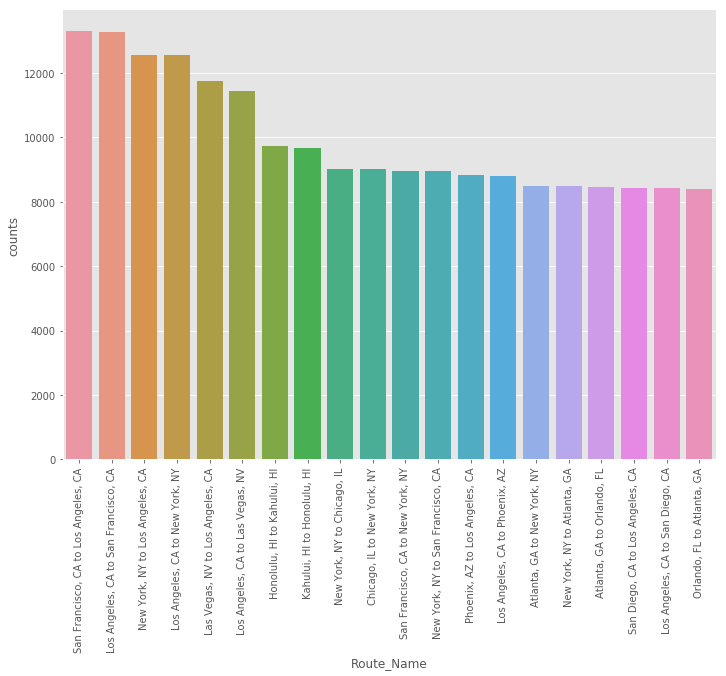

In [271]:
#g = sns.factorplot("year", data=planets, aspect=1.5, kind="count", color="b")
#g.set_xticklabels(rotation=30)
#g  = sns.barplot(x="Route_Name", y="counts", data= df_route_.iloc[0:20])
#plt.setp(g.get_xticklabels(), rotation=45)
fig, ax = plt.subplots()

fig.set_size_inches(11.7, 8.27)
sns.barplot(x="Route_Name", y="counts", data= df_route_.iloc[0:20])
sns.despine(offset = 0, trim = True)
plt.xticks(rotation=90) 


In [266]:
df_route_.head()

,period,counts,Origin,Destination,Route_Name
4221,1477112892,13298,"San Francisco, CA","Los Angeles, CA","San Francisco, CA to Los Angeles, CA"
2525,1289214771,13284,"Los Angeles, CA","San Francisco, CA","Los Angeles, CA to San Francisco, CA"
2305,1247812892,12554,"New York, NY","Los Angeles, CA","New York, NY to Los Angeles, CA"
2490,1289212478,12551,"Los Angeles, CA","New York, NY","Los Angeles, CA to New York, NY"
2409,1288912892,11754,"Las Vegas, NV","Los Angeles, CA","Las Vegas, NV to Los Angeles, CA"


In [20]:
def Get_Route(k,df_route_):
    route =  df_route_.iloc[[k-1]].index.values
    times = df_route_.iloc[[k-1]].values.tolist()[0][0]
    print(times)
    origin = df_airp_dir[df_airp_dir['Code'] == int(route[0][:5])].values.tolist()[0][1]
    destination = df_airp_dir[df_airp_dir['Code'] == int(route[0][5:])].values.tolist()[0][1]

    #destination = route[0][5:]
    #print(df_airp_dir[df_airp_dir['Code'] == int(origin)].values.tolist()[0][1])
    print("The {}th most popular route is from {} to {}".format(k,origin, destination))

In [21]:
#Get_Route(15,df_route_)

### Q2. What carrier has flown the 3rd most number of flights? How many? 

In [22]:
## Removing count of cancelled flights
df_ = df[df['CANCELLED'] == 0]
df_carrier = df_.groupby(['UNIQUE_CARRIER']).size().reset_index(name='counts').sort_values(ascending= False,by = 'counts')
#df_carrier.columns = df_carrier.columns.droplevel(0)
#df_carrier_ = df_carrier.iloc[:,1].to_frame().sort_values(ascending= False,by = 'count')
#EV

In [274]:
#df_carrier_.head()
#df_carrier_dir.head()

,Code,Description
0,02Q,Titan Airways (2006 - )
1,04Q,Tradewind Aviation (2006 - )
2,05Q,"Comlux Aviation, AG (2006 - 2012)"
3,06Q,Master Top Linhas Aereas Ltd. (2007 - )
4,07Q,Flair Airlines Ltd. (2007 - )


### Q3 What airport has the 10th most delays? 

In [23]:
#Arrival Delay 
df_delay_ = df[['ARR_DELAY_NEW',"DEST_AIRPORT_ID"]] 
df_arr = df_delay_.groupby(['DEST_AIRPORT_ID']).sum().sort_values(ascending= False,by = 'ARR_DELAY_NEW')

#Departure Delay
df_dep_= df_[['DEP_DELAY_NEW',"ORIGIN_AIRPORT_ID"]] 
df_dep = df_dep_.groupby(['ORIGIN_AIRPORT_ID']).sum().sort_values(ascending= False,by = 'DEP_DELAY_NEW')

#df_arr.columns = df_arr.columns.droplevel(0)
df_dep.head()

,DEP_DELAY_NEW
ORIGIN_AIRPORT_ID,
13930,5068260.0
10397,4117759.0
11298,3885016.0
11292,3534133.0
12892,2688709.0


In [24]:
df_delay = pd.merge(df_dep, df_arr, left_index=True, right_index=True)

In [25]:
df_delay['Total Delay'] = df_delay['DEP_DELAY_NEW'] + df_delay['ARR_DELAY_NEW']
df_delay['Airport_ID'] = df_delay.index
df_delay['Airport'] = df_delay['Airport_ID'].apply(lambda x: (df_airp_dir[df_airp_dir['Code'] == x].values.tolist()[0][1]).split(':')[1])

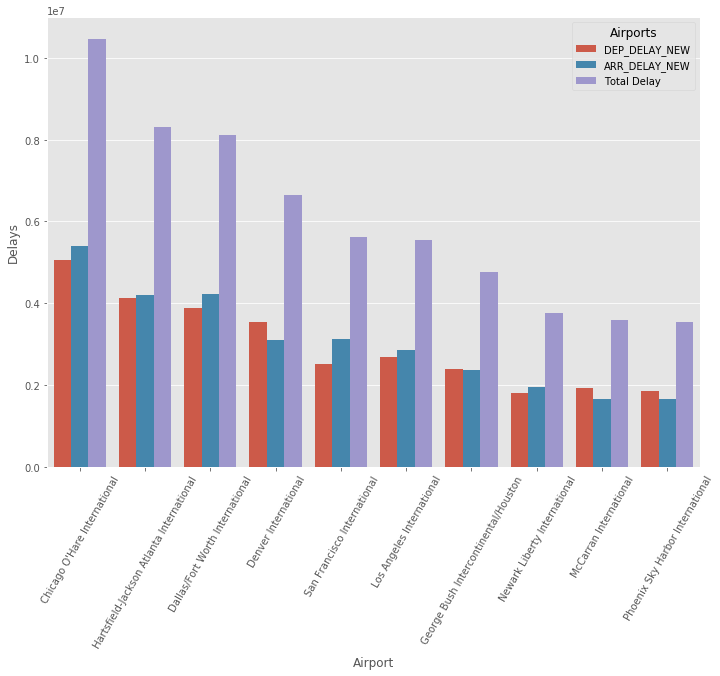

In [440]:
df_delay = df_delay.drop(['Airport_ID'], axis =1).sort_values(ascending= False,by = 'Total Delay')
#Sum delays
df_delay_plot = pd.melt(df_delay[0:10], id_vars="Airport", var_name="Airports", value_name="Delays")
f, ax = plt.subplots(figsize=(11.7, 8.27))
sns.factorplot(x='Airport', y="Delays", hue='Airports', data=df_delay_plot, kind='bar', ax = ax)
plt.setp(ax.get_xticklabels(), rotation=60)
plt.close(2)
plt.show()

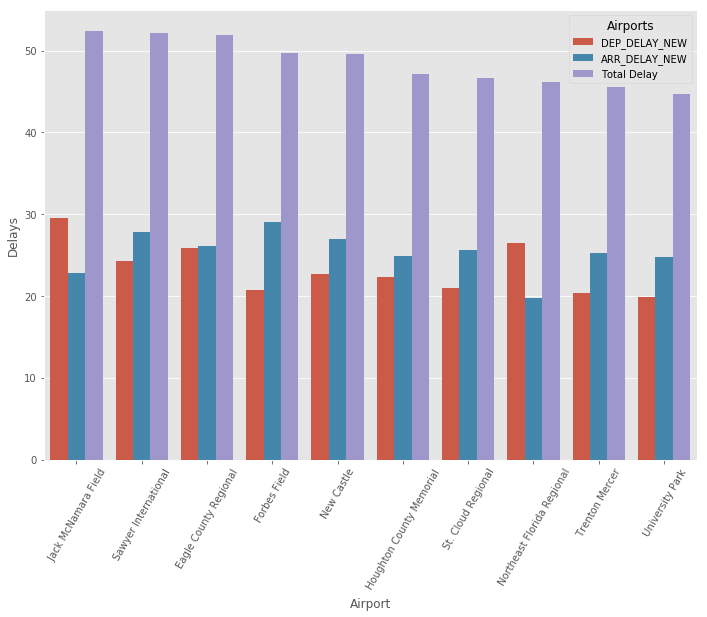

In [433]:
#Mean delays
df_delay_plot = pd.melt(df_delay[0:10], id_vars="Airport", var_name="Airports", value_name="Delays")
f, ax = plt.subplots(figsize=(11.7, 8.27))
sns.factorplot(x='Airport', y="Delays", hue='Airports', data=df_delay_plot, kind='bar', ax = ax)
plt.setp(ax.get_xticklabels(), rotation=60)
plt.close(2)
plt.show()

In [402]:
df_delay[0:10]
#The answer is Phoenix Sky Harbor International.

,DEP_DELAY_NEW,ARR_DELAY_NEW,Total Delay,Airport
13930,5068260.0,5403345.0,10471605.0,Chicago O'Hare International
10397,4117759.0,4195308.0,8313067.0,Hartsfield-Jackson Atlanta International
11298,3885016.0,4237688.0,8122704.0,Dallas/Fort Worth International
11292,3534133.0,3109325.0,6643458.0,Denver International
14771,2504576.0,3127287.0,5631863.0,San Francisco International
12892,2688709.0,2852542.0,5541251.0,Los Angeles International
12266,2384846.0,2368760.0,4753606.0,George Bush Intercontinental/Houston
11618,1810129.0,1957536.0,3767665.0,Newark Liberty International
12889,1935302.0,1656182.0,3591484.0,McCarran International
14107,1866346.0,1664589.0,3530935.0,Phoenix Sky Harbor International


### Q4. What is the second most popular day of the week to travel? Why?


In [28]:
#Convert to datetime 
df['Date'] = pd.to_datetime(df['FL_DATE'],format='%Y-%m-%d', errors='ignore')

In [29]:
#Extract date details 
from datetime import datetime as dt
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday   #Monday is 0 and Sunday is 6

In [30]:
#Count most popular day of the week 
df_pop = df.groupby(['Weekday']).size().reset_index(name='counts').sort_values(ascending= False,by = 'counts')


In [31]:
df_pop.head()
# Wednesday

,Weekday,counts
0,0,867299
2,2,864033
4,4,863423
3,3,862984
1,1,845320


# my analysis

In [133]:
df1.head()

,DEP_TIME,DEP_DELAY,ARR_DELAY_NEW,ARR_DEL15,DEP_DEL15,DEP_DELAY_NEW,DEP_DELAY
0,1457.0,102.0,109.0,1.0,1.0,102.0,102.0
1,1133.0,28.0,40.0,1.0,1.0,28.0,28.0
2,752.0,2.0,9.0,0.0,0.0,2.0,2.0
3,2142.0,267.0,271.0,1.0,1.0,267.0,267.0
4,1114.0,69.0,68.0,1.0,1.0,69.0,69.0


In [129]:
df1=df.loc[df['UNIQUE_CARRIER'] == 'AA']
df1=df1.loc[df1['ORIGIN'] == 'ORD']
df1 = df1[['DEP_TIME','DEP_DELAY','ARR_DELAY_NEW','ARR_DEL15','DEP_DEL15','DEP_DELAY_NEW','DEP_DELAY']]
df1=df1.dropna() 
df1=df1.reset_index(drop=True)
df1.head()

,DEP_TIME,DEP_DELAY,ARR_DELAY_NEW,ARR_DEL15,DEP_DEL15,DEP_DELAY_NEW,DEP_DELAY
0,1457.0,102.0,109.0,1.0,1.0,102.0,102.0
1,1133.0,28.0,40.0,1.0,1.0,28.0,28.0
2,752.0,2.0,9.0,0.0,0.0,2.0,2.0
3,2142.0,267.0,271.0,1.0,1.0,267.0,267.0
4,1114.0,69.0,68.0,1.0,1.0,69.0,69.0


In [130]:
 #sns.pairplot(df1)

In [131]:
#df_new=df.drop(['Date','Unnamed: 50','DEST_CITY_NAME','DEST_STATE_NM','FL_DATE'], axis=1)

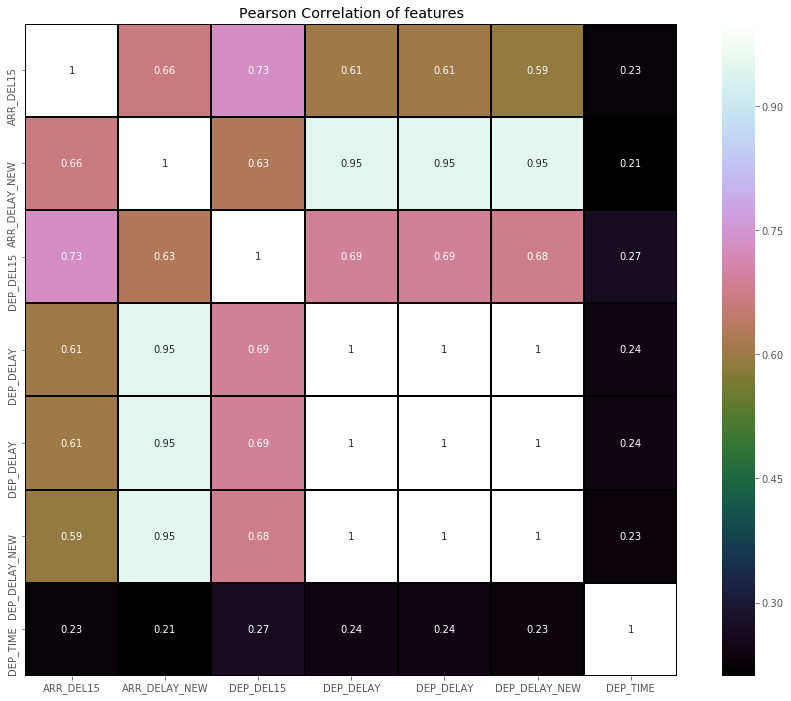

In [132]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df1.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df1.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = df1[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation of features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=1,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)